In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import sys
sys.path.append("../exp2/")
import gpflow
import tensorflow as tf
%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/nipun.batra/anaconda3/envs/gpflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/nipun.batra/anaconda3/envs/gpflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/nipun.batra/anaconda3/envs/gpflow/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/nipun.batra/anaconda3/env

In [2]:
df = pd.read_csv("../data/beijingb_scaled.csv", index_col = 0)
df = df.rename(columns={'ts': 'Time', 'station_id': 'Station'})

In [9]:
stations = df['Station'].unique()
stations.sort()

In [4]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)

In [5]:
splits = 6

In [7]:
from sklearn.model_selection import KFold

In [8]:
kfout = KFold(n_splits=splits, shuffle=True, random_state=0)
kfin = KFold(n_splits=splits - 1, shuffle=True, random_state=0)

In [11]:
station_split = {}

In [12]:
for kout, (sts_ftrain_index, sts_test_index) in enumerate(kfout.split(stations)):
    station_split[kout] = {}
    for kin, (sts_train_index, sts_val_index) in enumerate(kfin.split(sts_ftrain_index)):
        sts_test = stations[sts_test_index]
        sts_val = stations[sts_ftrain_index[sts_val_index]]
        sts_train = stations[sts_ftrain_index[sts_train_index]]
        station_split[kout][kin] = {
            'sts_test': sts_test,
            'sts_val': sts_val,
            'sts_train': sts_train,
        }

In [13]:
station_split

{0: {0: {'sts_test': array([1016., 1017., 1021., 1023., 1031., 1032.]),
   'sts_val': array([1003., 1011., 1014., 1029., 1033., 1035.]),
   'sts_train': array([1001., 1002., 1004., 1005., 1006., 1007., 1008., 1009., 1010.,
          1012., 1013., 1015., 1018., 1019., 1020., 1022., 1024., 1025.,
          1026., 1027., 1028., 1030., 1034., 1036.])},
  1: {'sts_test': array([1016., 1017., 1021., 1023., 1031., 1032.]),
   'sts_val': array([1006., 1012., 1019., 1020., 1027., 1034.]),
   'sts_train': array([1001., 1002., 1003., 1004., 1005., 1007., 1008., 1009., 1010.,
          1011., 1013., 1014., 1015., 1018., 1022., 1024., 1025., 1026.,
          1028., 1029., 1030., 1033., 1035., 1036.])},
  2: {'sts_test': array([1016., 1017., 1021., 1023., 1031., 1032.]),
   'sts_val': array([1002., 1009., 1015., 1025., 1028., 1036.]),
   'sts_train': array([1001., 1003., 1004., 1005., 1006., 1007., 1008., 1010., 1011.,
          1012., 1013., 1014., 1018., 1019., 1020., 1022., 1024., 1026.,
        

In [30]:
from gpsampling import GPActive
gp = GPActive(
    df = df,
    train_stations = list(station_split[0][0]['sts_train']),
    pool_stations = list(station_split[0][0]['sts_val']),
    test_stations = list(station_split[0][0]['sts_test']),
    context_days = 29,
    frequency = 30,
    test_days = 100,
    train_days = 100,
    number_to_query = 1,
    number_of_seeds=20
)

INIT
True True
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2577.371710
  Number of iterations: 395
  Number of functions evaluations: 453


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2577.371710
  Number of iterations: 395
  Number of functions evaluations: 453


In [ ]:
gp.active_gp()

Current Day before update: 29

Current Day after update: 30
Stations added -  [1029.0]  on day  30

Train DataFrame Shape (716, 9)

Pool DataFrame Shape (153, 11)

Test DataFrame Shape (6, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2668.991775
  Number of iterations: 134
  Number of functions evaluations: 207


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2668.991775
  Number of iterations: 134
  Number of functions evaluations: 207


Current Day before update: 30

Current Day after update: 31

Train DataFrame Shape (738, 9)

Pool DataFrame Shape (158, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2728.562056
  Number of iterations: 358
  Number of functions evaluations: 427


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2728.562056
  Number of iterations: 358
  Number of functions evaluations: 427


Current Day before update: 31

Current Day after update: 32

Train DataFrame Shape (761, 9)

Pool DataFrame Shape (163, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2802.516963
  Number of iterations: 255
  Number of functions evaluations: 326


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2802.516963
  Number of iterations: 255
  Number of functions evaluations: 326


Current Day before update: 32

Current Day after update: 33

Train DataFrame Shape (785, 9)

Pool DataFrame Shape (168, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2880.964659
  Number of iterations: 197
  Number of functions evaluations: 272


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2880.964659
  Number of iterations: 197
  Number of functions evaluations: 272


Current Day before update: 33

Current Day after update: 34

Train DataFrame Shape (809, 9)

Pool DataFrame Shape (173, 11)

Test DataFrame Shape (5, 9)
INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2962.072936
  Number of iterations: 147
  Number of functions evaluations: 205


INFO:tensorflow:Optimization terminated with:
  Message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
  Objective function value: 2962.072936
  Number of iterations: 147
  Number of functions evaluations: 205


Current Day before update: 34

Current Day after update: 35

Train DataFrame Shape (833, 9)

Pool DataFrame Shape (178, 11)

Test DataFrame Shape (5, 9)


In [22]:
import xgboost

In [ ]:
## max_depth:10, lr =1, n_est: 10
## max_depth:10, lr = 1, m_est :50
## max_dpeth :10, lr:1 n_est:50
## max_dpeth:50, lr = 1, n_est10

In [26]:
learners = {0:xgboost.XGBRegressor(), 
            1:xgboost.XGBRegressor(max_depth=10, learning_rate=1, n_estimators=10),
            2:xgboost.XGBRegressor(max_depth=10, learning_rate=1, n_estimators=50),
            3:xgboost.XGBRegressor(max_depth=50, learning_rate=1, n_estimators=10),
            4:xgboost.XGBRegressor(max_depth=50, learning_rate=1, n_estimators=50),
           }

In [27]:
from qbc_random import ActiveLearning
al = ActiveLearning(
    df = df,
    train_stations = list(station_split[0][0]['sts_train']),
    pool_stations = list(station_split[0][0]['sts_val']),
    test_stations = list(station_split[0][0]['sts_test']),
    learners = learners,
    context_days = 29,
    frequency = 30,
    test_days = 100,
    train_days = 100,
    number_of_seeds = 50,
    number_to_query = 1
            )
al.querybycommittee()

[00:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 29

Current Day after update: 30
Stations added -  [1029.0]  on day  30
2nd

Train DataFrame Shape (716, 9)

Pool DataFrame Shape (153, 11)

Test DataFrame Shape (6, 9)
[00:49:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:49] WARNING: /workspace/src/objecti

[00:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 39

Current Day after update: 40
2nd

Train DataFrame Shape (958, 9)

Pool DataFrame Shape (203, 11)

Test DataFrame Shape (5, 9)
[00:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:49:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is

[00:50:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 50

Current Day after update: 51
2nd

Train DataFrame Shape (1233, 9)

Pool DataFrame Shape (252, 11)

Test DataFrame Shape (6, 9)
[00:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear i

[00:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 60

Current Day after update: 61
2nd

Train DataFrame Shape (1481, 9)

Pool DataFrame Shape (246, 11)

Test DataFrame Shape (6, 9)
[00:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear i

2nd

Train DataFrame Shape (1737, 9)

Pool DataFrame Shape (286, 11)

Test DataFrame Shape (6, 9)
[00:50:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 71

Current Day after update: 72
2nd

Train DataFrame Shape (1763, 9)

Pool DataFrame Shape (290, 11)

Test DataFrame Shape (6, 9)
[00:50:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of 

[00:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 81

Current Day after update: 82
2nd

Train DataFrame Shape (2022, 9)

Pool DataFrame Shape (330, 11)

Test DataFrame Shape (6, 9)
[00:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear i

Current Day before update: 91

Current Day after update: 92
2nd

Train DataFrame Shape (2197, 9)

Pool DataFrame Shape (264, 11)

Test DataFrame Shape (1, 9)
[00:50:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:50:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 92

Current Day after update: 93
2nd

Train DataFrame Shape (2203, 9)

Pool DataFrame Shape (264, 11)

Test DataFrame Shape (1, 9)
[00:50:51] WARNING: /workspace/src/objective/regr

[00:51:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 102

Current Day after update: 103
2nd

Train DataFrame Shape (2328, 9)

Pool DataFrame Shape (288, 11)

Test DataFrame Shape (6, 9)
[00:51:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear

Current Day before update: 112

Current Day after update: 113
2nd

Train DataFrame Shape (2359, 9)

Pool DataFrame Shape (318, 11)

Test DataFrame Shape (6, 9)
[00:51:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 113

Current Day after update: 114
2nd

Train DataFrame Shape (2363, 9)

Pool DataFrame Shape (321, 11)

Test DataFrame Shape (6, 9)
[00:51:20] WARNING: /workspace/src/objective/

[00:51:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Current Day before update: 123

Current Day after update: 124
2nd

Train DataFrame Shape (2406, 9)

Pool DataFrame Shape (233, 11)

Test DataFrame Shape (6, 9)
[00:51:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:51:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear

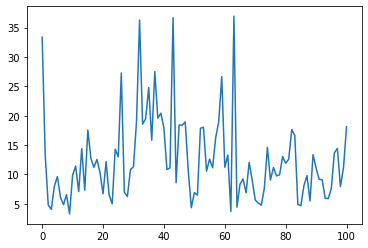

In [28]:
plt.plot(al.qbc_rmse)